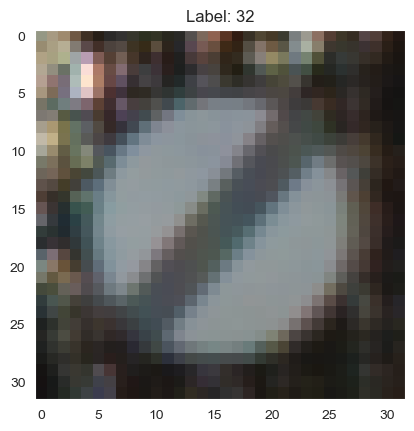

C:\Users\erikm\anaconda3\envs\kipraktikum2\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 43)             │         5,547 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 361,067 (1.38 MB)

 Trainable params: 361,067 (1.38 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 15s 24ms/step - accuracy: 0.2020 - loss: 2.9745 - val_accuracy: 0.6193 - val_loss: 1.2244
Epoch 2/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6680 - loss: 1.0132 - val_accuracy: 0.8315 - val_loss: 0.6036
Epoch 3/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8367 - loss: 0.4937 - val_accuracy: 0.8946 - val_loss: 0.4433
Epoch 4/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 23ms/step - accuracy: 0.9042 - loss: 0.2907 - val_accuracy: 0.9048 - val_loss: 0.3536
Epoch 5/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9281 - loss: 0.2115 - val_accuracy: 0.9111 - val_loss: 0.3783
Epoch 6/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.9432 - loss: 0.1659 - val_accuracy: 0.9186 - val_loss: 0.3633
Epoch 7/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.9536 - loss: 0.1426 - val_accuracy: 0.9413 - val_loss: 0.2994
Epoch 8/40
544/544 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step - accuracy: 0.9634 - loss: 0.1070 - 

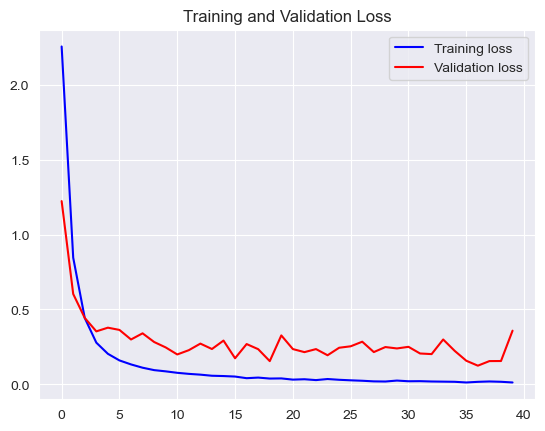

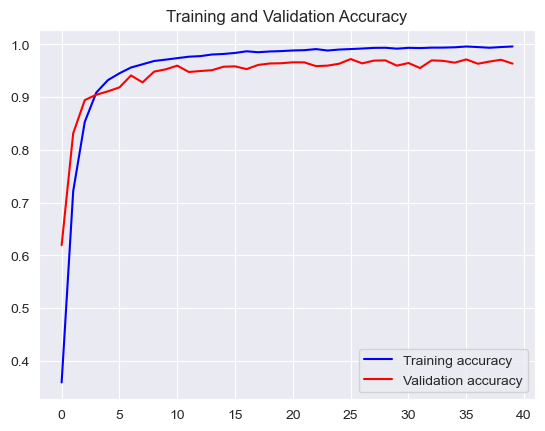

138/138 - 1s - 5ms/step - accuracy: 0.9637 - loss: 0.3583
Validation Accuracy: 96.37%
395/395 - 2s - 5ms/step - accuracy: 0.9516 - loss: 0.5246
Test Accuracy: 95.16%
138/138 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


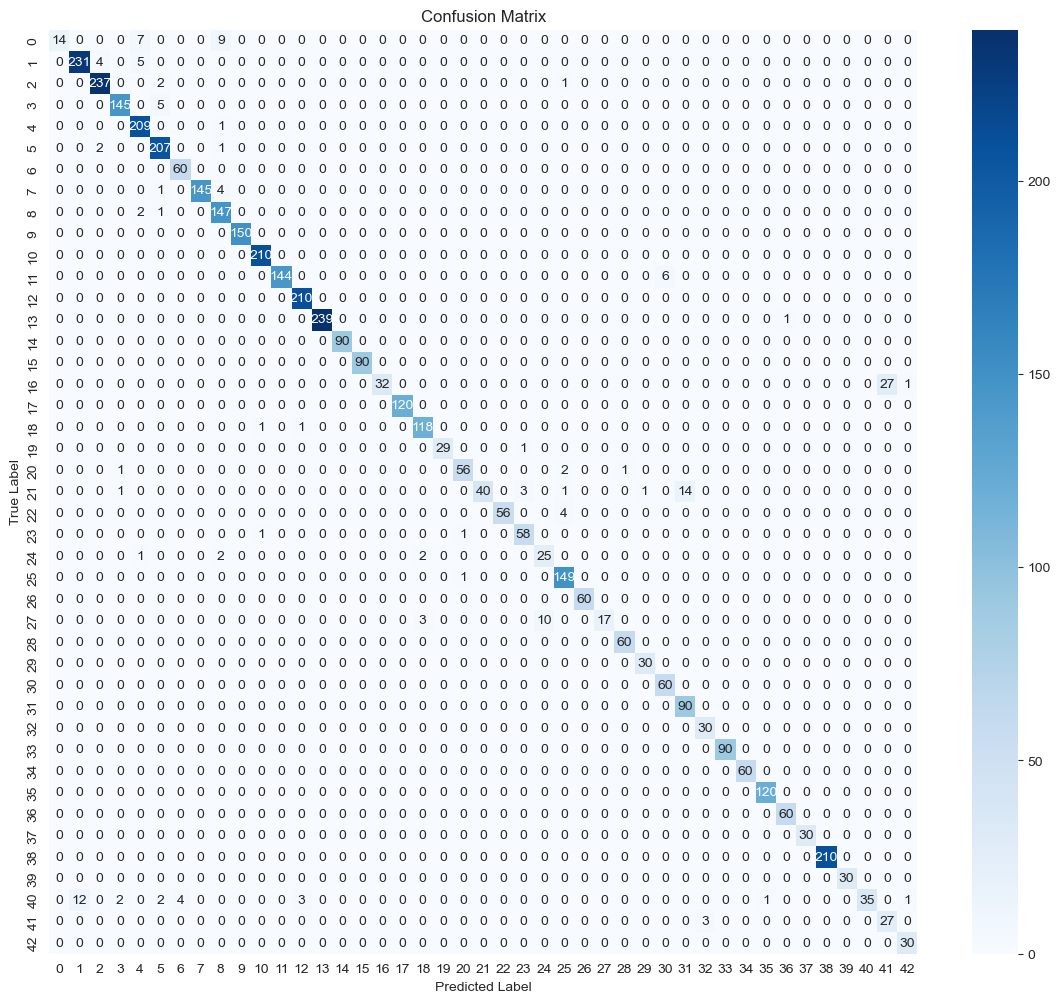

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


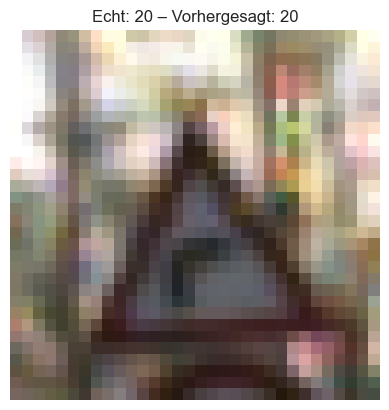

In [1]:
# %% Imports
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import pandas as pd
import seaborn as sns
import pickle
import random
import os
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix

# %% Daten laden
with open(os.path.join("dataset", "train.p"), mode='rb') as training_data:
    train = pickle.load(training_data)
with open(os.path.join("dataset", "valid.p"), mode='rb') as validation_data:
    valid = pickle.load(validation_data)

X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']

# %% Vorverarbeitung
X_train, y_train = shuffle(X_train, y_train)
X_valid, y_valid = shuffle(X_valid, y_valid)

X_train_norm = X_train.astype('float32') / 255.
X_valid_norm = X_valid.astype('float32') / 255.

# %% Beispielbild anzeigen
i = random.randint(1, len(X_train_norm))
plt.grid(False)
plt.imshow(X_train[i])
plt.title(f"Label: {y_train[i]}")
plt.show()

# %% CNN-Modell definieren
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(43, activation='softmax')  # 43 Klassen
])

model.summary()

# %% Kompilieren & Trainieren
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    x=X_train_norm,
    y=y_train,
    batch_size=64,
    epochs=40,
    validation_data=(X_valid_norm, y_valid),
    verbose=1
)

# %% Trainingsverlauf anzeigen
epochs = range(len(history.history['accuracy']))

plt.figure()
plt.plot(epochs, history.history['loss'], 'b', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# %% Modell speichern
os.makedirs('saved_model', exist_ok=True)
model.save('saved_model/traffic_sign_model.h5')

# %% Modell evaluieren mit Validierungsdaten (wenn kein test.p vorhanden)
test_loss, test_accuracy = model.evaluate(X_valid_norm, y_valid, verbose=2)
print(f"Validation Accuracy: {test_accuracy:.2%}")

# %% Optional: Modell mit echten Testdaten evaluieren
try:
    with open(os.path.join("dataset", "test.p"), mode='rb') as test_data:
        test = pickle.load(test_data)
    X_test, y_test = test['features'], test['labels']
    X_test = X_test.astype('float32') / 255.
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
    print(f"Test Accuracy: {test_accuracy:.2%}")
except FileNotFoundError:
    print("⚠️ Kein test.p gefunden – nutze stattdessen Validierungsdaten.")

# %% Konfusionsmatrix anzeigen
y_pred_probs = model.predict(X_valid_norm)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_valid, y_pred)
plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# %% Beispielhafte Einzelbild-Vorhersage
index = random.randint(0, len(X_valid_norm) - 1)
image = X_valid_norm[index]
true_label = y_valid[index]
predicted_label = np.argmax(model.predict(image.reshape(1, 32, 32, 3)))

plt.imshow(X_valid[index])
plt.title(f"Echt: {true_label} – Vorhergesagt: {predicted_label}")
plt.axis('off')
plt.show()
